In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/files/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.shape

(253680, 22)

In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.isnull() #missing value check: false= no mising value

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253676,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


1.   0=213703 rows:no diabetes or only during pregnancy,
2.   1=4631 rows : prediabetes,
3.   2=35346 rows:diabetes,






In [ ]:
df.loc[(df.Diabetes_012 ==0)]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0


In [ ]:
df['Diabetes_012'].replace({1:0}, inplace=True) #combining diabetes and prediabetics into same category

In [ ]:
df['Diabetes_012'].replace({2:1}, inplace=True) #combining diabetes and prediabetics into same category

In [ ]:
df.loc[(df.Diabetes_012 ==0)]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0


In [ ]:
df.loc[(df.Diabetes_012 ==1)]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,1.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,1.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,1.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
253668,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

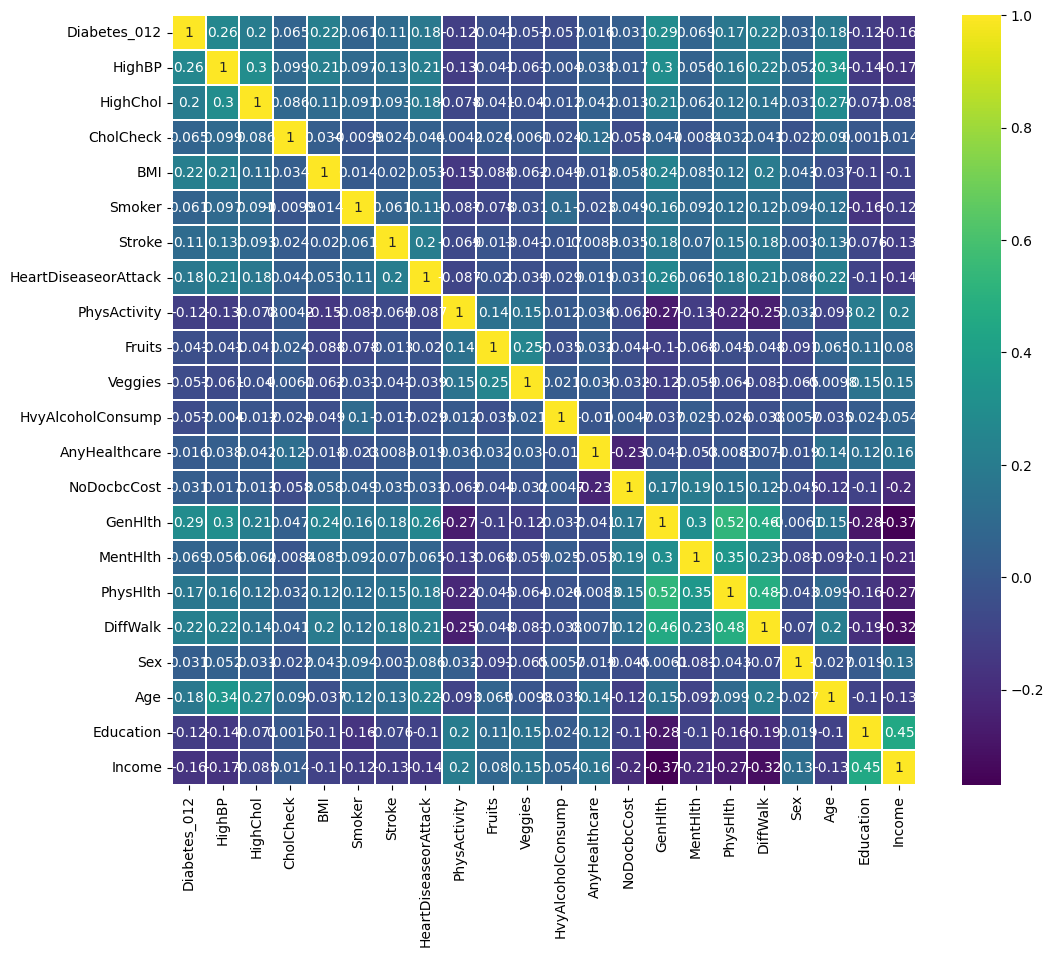

In [ ]:
plt.figure(figsize=(12,10))
# sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')
sns.heatmap(df.corr(),annot=True, cmap='viridis',linewidths=.1)
plt.show()

In [ ]:
X = df.drop(['Diabetes_012','CholCheck','Smoker','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare', 'NoDocbcCost','MentHlth','Sex'], axis=1)
#X = df.drop(['Diabetes_012',], axis=1)
y = df['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42 )

In [ ]:
X

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,1.0,1.0,40.0,0.0,0.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,25.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,28.0,0.0,0.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0
3,1.0,0.0,27.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,24.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,0.0,0.0,3.0,5.0,0.0,5.0,6.0,7.0
253676,1.0,1.0,18.0,0.0,0.0,0.0,4.0,0.0,1.0,11.0,2.0,4.0
253677,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,23.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0,5.0,1.0


Random Forest

In [ ]:
# RandomForestClassifier_ with K fold

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = RandomForestClassifier()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  84.94205298013246 +- 0.48168988457001505
test precision:  41.81709230890346 +- 0.6350648785819984
test recall:  20.59209656780391 +- 0.6718894648905713
test f1_score:  27.58563750757116 +- 0.5721781780179916


In [ ]:
# #AdaBoost
from sklearn.ensemble import AdaBoostClassifier
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = AdaBoostClassifier ()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  86.51095868811099 +- 0.3992237108566158
test precision:  54.918196091717356 +- 0.6861214021503282
test recall:  17.775139241780163 +- 0.9143346006931021
test f1_score:  26.843405434132162 +- 1.0314187682004423


In [ ]:
# #Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = GradientBoostingClassifier()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  86.60162409334595 +- 0.3647964294858246
test precision:  56.78183572018087 +- 1.1418551181447933
test recall:  15.973650917643589 +- 0.8945009488678126
test f1_score:  24.922921580108724 +- 1.1526780050557879


In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = GaussianNB()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  79.3574582150741 +- 0.7338759610955184
test precision:  33.646918167077104 +- 0.3686697507794988
test recall:  49.5280776405567 +- 1.1341995740669109
test f1_score:  40.06697978860763 +- 0.5302551356602642


In [ ]:
#SVC
from sklearn.svm import SVC

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = SVC()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

In [ ]:
#KNN
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = KNeighborsClassifier()
k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  84.78437401450647 +- 0.5015709404810231
test precision:  40.63737578663592 +- 0.8670208233317067
test recall:  19.913218014383737 +- 0.4578959774500486
test f1_score:  26.7203277703936 +- 0.37131253139566117


In [ ]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = LinearDiscriminantAnalysis()
k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  86.06866918953011 +- 0.5743557779841176
test precision:  50.235705598039125 +- 2.1592540371039246
test recall:  19.991878332859926 +- 1.0949934456401116
test f1_score:  28.54928940544304 +- 0.8128506516124413


In [ ]:
#DNN
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Perform k-fold cross-validation (k=5)
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_indices, test_indices in k_fold.split(X, y):
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the model architecture
    model = Sequential()
    model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Predict probabilities on test data
    y_pred_proba = model.predict(X_test)
    # Convert probabilities to class predictions
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculate average scores
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

# Print the results
print('test accuracy: {:.2f} ± {:.2f}'.format(avg_accuracy * 100, np.std(accuracy_scores) * 100))
print('test precision: {:.2f} ± {:.2f}'.format(avg_precision * 100, np.std(precision_scores) * 100))
print('test recall: {:.2f} ± {:.2f}'.format(avg_recall * 100, np.std(recall_scores) * 100))
print('test f1_score: {:.2f} ± {:.2f}'.format(avg_f1 * 100, np.std(f1_scores) * 100))

1586/1586 [==============================] - 3s 2ms/step
test accuracy: 86.56 ± 0.06
test precision: 56.31 ± 0.79
test recall: 15.64 ± 0.49
test f1_score: 24.47 ± 0.66


Testing DNN

In [ ]:
#DNN
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Perform k-fold cross-validation (k=5)
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_indices, test_indices in k_fold.split(X, y):
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the model architecture
    model = Sequential()
    model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30, batch_size=8, verbose=0)

    # Predict probabilities on test data
    y_pred_proba = model.predict(X_test)
    # Convert probabilities to class predictions
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculate average scores
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

# Print the results
print('test accuracy: {:.2f} ± {:.2f}'.format(avg_accuracy * 100, np.std(accuracy_scores) * 100))
print('test precision: {:.2f} ± {:.2f}'.format(avg_precision * 100, np.std(precision_scores) * 100))
print('test recall: {:.2f} ± {:.2f}'.format(avg_recall * 100, np.std(recall_scores) * 100))
print('test f1_score: {:.2f} ± {:.2f}'.format(avg_f1 * 100, np.std(f1_scores) * 100))

1586/1586 [==============================] - 2s 1ms/step
test accuracy: 86.61 ± 0.05
test precision: 57.43 ± 1.11
test recall: 15.13 ± 0.68
test f1_score: 23.94 ± 0.77
